In [8]:
#pip install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats.mstats import winsorize
pd.set_option('display.max_columns', 1000, 'display.width', 1000, 'display.max_rows',100)

## <center> Question  1 <center>

#### a) First focus on df_returns. Give a graphical overview of how many company returns are available (=not missing) over time. Which companies do you decide for? Does your choice induce any biases?

##### First of all we load the data from the file "returns.csv" containing the companies and their return:

In [9]:
df=pd.read_csv('C:/Users/sunny/Desktop/fiveer/data_files/data/returns.csv')
df.head(10),df.shape

(   permno        date        RET
 0   10080  2000-01-31   0.583333
 1   10080  2000-02-29  -0.315789
 2   10080  2000-03-31  -0.076923
 3   10080  2000-04-28   0.125000
 4   10080  2000-05-31  -0.018519
 5   10080  2000-06-30  -0.037736
 6   10080  2000-07-31  -0.176471
 7   10080  2000-08-31  -0.047619
 8   10080  2000-09-29  -0.200000
 9   10080  2000-10-31   0.437500,
 (60407, 3))

##### To simplify the data analysis we decide to separate the date into three different columns for date, year and month, and assign an incremental index calculated on the basis of the year and month:

In [10]:
df[['Year','Month','Day']]=df['date'].str.split('-',expand=True).astype(int)# create a separate column for month day and year
df=df.drop(['date'],axis=1)
df['ind'] = df.groupby(['Year','Month']).grouper.group_info[0] + 1 # add month counter index
df.head()

,permno,RET,Year,Month,Day,ind
0,10080,0.583333,2000,1,31,1
1,10080,-0.315789,2000,2,29,2
2,10080,-0.076923,2000,3,31,3
3,10080,0.125000,2000,4,28,4
4,10080,-0.018519,2000,5,31,5


In [31]:
#df[df['ind']==200]
df['ind'].describe()

count    60407.000000
mean        92.019236
std         62.164934
min          1.000000
25%         36.000000
50%         84.000000
75%        148.000000
max        204.000000
Name: ind, dtype: float64

##### We plot the number of companies per moth during the whole period of time 

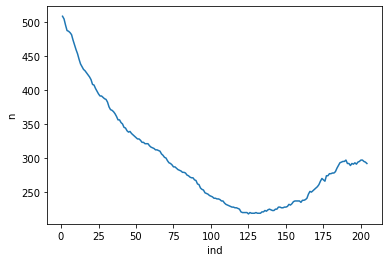

In [33]:
xx=df.copy()
xx['n']=1
xx
xx=xx.groupby(['ind'],as_index=False).sum()
xx
xx=xx[['ind','n']]
sns.lineplot(x='ind',y='n',data=xx)

##### We calculate the total number of companies:

In [5]:
len(df['permno'].value_counts())# number of companies

682

##### The total number of companies is 682. Now we have to find how many return values are missing: for this task we first look at the data type of every column:

In [6]:
df.dtypes

permno     int64
RET       object
Year       int32
Month      int32
Day        int32
ind        int64
n          int64
dtype: object

##### As we can see our variable of interest 'RET' has been saved as a variable of type 'object', since we know that it is actually of type float we decide to type cast the variable:

In [7]:
df['RET']=df['RET'].astype(float)

ValueError: could not convert string to float: '.'

##### The error we get is due to the presence of '.' character in the cells of the data so now we can visually show all the missing values by filtering the dataframe on this character:

In [8]:
df[df['RET']=='.']# Visual rappresentation of missing RET values

,permno,RET,Year,Month,Day,ind,n
46,10080,.,2003,11,28,47,1
56,10087,.,2000,10,31,10,1
215,10100,.,2013,3,28,159,1
246,10149,.,2002,7,31,31,1
582,10205,.,2010,12,31,132,1
...,...,...,...,...,...,...,...
59993,86574,.,2011,11,30,143,1
60153,86685,.,2013,4,30,160,1
60211,86727,.,2004,10,29,58,1
60291,86729,.,2006,8,31,80,1


##### There are 1740 total missing values of return variable, and as we can see they are generally related to few records of some companies. To further investingate we decide to find out those companies which have no return values at all:

In [9]:
#list of companies which don't have RET at all
df_=df.groupby(['permno'])
for i,j in df_:
    if (j['RET']=='.').all() :
        print(j.head(),'\n',j.shape)
        
#5 companies no RET

      permno RET  Year  Month  Day  ind  n
4182   12544   .  2011      1   31  133  1
4183   12544   .  2011      2   28  134  1
4184   12544   .  2011      3   31  135  1 
 (3, 7)
       permno RET  Year  Month  Day  ind  n
10732   21821   .  2000      1   31    1  1 
 (1, 7)
       permno RET  Year  Month  Day  ind  n
17144   49083   .  2000      1   31    1  1 
 (1, 7)
       permno RET  Year  Month  Day  ind  n
47256   83274   .  2000      1   31    1  1 
 (1, 7)
       permno RET  Year  Month  Day  ind  n
49906   83968   .  2000      1   31    1  1 
 (1, 7)


##### Now is time to clean our dataset from this missing values in order to type cast the return variable to it's right variable type

In [10]:
# Drop all the missing RET value rows
df=df[df['RET']!='.']

In [11]:
# Typecast RET to float
df['RET']=df['RET'].astype(float)
df.head()

c:\users\sunny\pycharmprojects\pr\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,permno,RET,Year,Month,Day,ind,n
0,10080,0.583333,2000,1,31,1,1
1,10080,-0.315789,2000,2,29,2,1
2,10080,-0.076923,2000,3,31,3,1
3,10080,0.125000,2000,4,28,4,1
4,10080,-0.018519,2000,5,31,5,1


In [12]:
#shape after dropping all 1740 missing values
df.shape

(58667, 7)

##### We can now proceed in 3 different ways to the choice the companies: <br /> 1. Having the return values, we can proceed with the statistical analysis of this variable in order to consider only the companies that have had a statistically significant average return value over their entire time span. We use the IQR on the mean average return value for every company to identify outliers. <br /> 2. Do not discard any company and winsorize outliers in pre-crisis or non-crisis periods.  <br /> 3. Discard any company that has not reported values for more than 96 consecutive months.

##### For the first method we first calculate the mean average value of return for every company:

In [13]:
mean_return=df.groupby('permno',as_index=False).mean()
mean_return.head()

,permno,RET,Year,Month,Day,ind,n
0,10080,0.029582,2001.434783,6.282609,30.021739,23.5,1.0
1,10087,0.189387,2000.000000,5.000000,30.111111,5.0,1.0
2,10100,0.008498,2006.088608,6.436709,29.981013,79.5,1.0
3,10149,0.032112,2000.800000,5.900000,29.933333,15.5,1.0
4,10200,0.030841,2008.000000,6.500000,29.980392,102.5,1.0


##### We can then plot the boxplot of this variable:

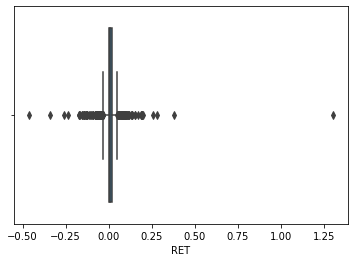

In [14]:
#box plot of mean RET 
sns.boxplot(mean_return['RET'])

##### We now calculate the IQR range:

In [15]:
Q1 = mean_return['RET'].quantile(0.25)
Q3 = mean_return['RET'].quantile(0.75)
IQR = Q3 - Q1

##### Now we define the outliers as those values wich are out of the 1.5* IQR range below Q1 and beyond Q3

In [16]:
filt = (mean_return['RET'] < (Q1 - 1.5 * IQR)) |(mean_return['RET'] > (Q3 + 1.5 * IQR))# calculate outliers from IQR

###### As we can see there are 123 outliers mean average return values corresponding each one to a company:

In [17]:
filt.sum()

123

###### On the basis of out calculation we can now drop these companies:

In [18]:
filt=~filt
mean_return = mean_return.loc[filt]
Final_df_returns=df[df['permno'].isin(mean_return['permno'].tolist())]
Final_df_returns.head()

,permno,RET,Year,Month,Day,ind,n
0,10080,0.583333,2000,1,31,1,1
1,10080,-0.315789,2000,2,29,2,1
2,10080,-0.076923,2000,3,31,3,1
3,10080,0.125000,2000,4,28,4,1
4,10080,-0.018519,2000,5,31,5,1


In [19]:
print('Total number of companies after removing outliers:',len(Final_df_returns['permno'].value_counts()),
      '\nShape of dataframe after removing outliers:',Final_df_returns.shape,
      '\nTotal number of companies before removing outliers:',len(df['permno'].value_counts()),
      '\nShape of dataframe after removing outliers:',df.shape)

Total number of companies after removing outliers: 554 
Shape of dataframe after removing outliers: (56490, 7) 
Total number of companies before removing outliers: 677 
Shape of dataframe after removing outliers: (58667, 7)


##### For winsorization we use scipy winsorize function and we create a custom function which taking the dataframe, the year and the percentages to consider returns the winsoring extremes:

In [20]:
def get_extreemes(df,year,percents):
    year_2000=df[df['Year']==year]
    sns.lineplot(data=year_2000['RET'])
    n=winsorize(year_2000['RET'], limits=percents)
    year_2000['RETI']=n.tolist()
    sns.lineplot(data=year_2000['RETI'])
    max_v=year_2000['RETI'].max()
    min_v=year_2000['RETI'].min()
    return max_v,min_v


###### We apply the function to our original dataframe for the year 2000, so that the winsorisation extremes are calculated as 1% higher and 1% lower of the return value:

c:\users\sunny\pycharmprojects\pr\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


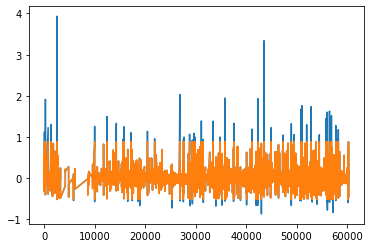

In [21]:
max_v,min_v=get_extreemes(df,2000,[0.01,0.01])# just 1%, year 2000 as pre-crisis

##### As we can see the function gives us the superimposed graph of the return values for the year 2000 and the return values as they would be following the winsorization

##### Having the values of the extremes of the winsorization for yesr 2000 we can apply the same calculation to the entire dataset:

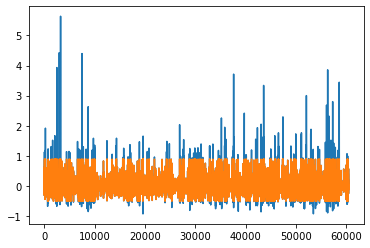

In [22]:
sns.lineplot(data=df['RET'])#plot complete data
sns.lineplot(data=df['RET'].clip(min_v, max_v))#plot complete winsorized data

###### Since the main purpose of winsorization is to replace the outliers with the extreme values ​​allowed, let's try to calculate the outliers for the entire dataset using IQR:

In [23]:
Q1 = df['RET'].quantile(0.25)
Q3 = df['RET'].quantile(0.75)
IQR = Q3 - Q1
filt = (df['RET'] < (Q1 - 1.5 * IQR)) |(df['RET'] > (Q3 + 1.5 * IQR))# calculate outliers from IQR

In [24]:
filt.sum()# number of outliers 

5370

##### We therefore report on a single graph the return outliers values ​​just calculated, the original values ​​and the winsorization range that should be applied to the data:

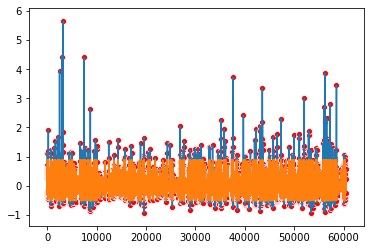

In [25]:
sns.lineplot(data=df['RET'])#complete original data
sns.scatterplot(data=df['RET'].loc[filt],color='r')# outliers according to the IQR
sns.lineplot(data=df['RET'].clip(min_v, max_v))#plot winsorization strip

##### As we can see, winsorisation would limit all the data in the central range shown in the figure above

##### For the third method we have:

In [26]:
df_x=df
df_x['n']=1
df_x=df_x.groupby(['permno'],as_index=False).sum()
df_x.sort_values(['n'],ascending=False)
companies_list=df_x[df_x['n']>=96]['permno']
companies_list
df_returns_final=df[df['permno'].isin(companies_list)]
df_returns_final.drop(['n'],axis=1,inplace=True)
df_returns_final

c:\users\sunny\pycharmprojects\pr\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\sunny\pycharmprojects\pr\venv\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,permno,RET,Year,Month,Day,ind
57,10100,-0.030303,2000,1,31,1
58,10100,0.046875,2000,2,29,2
59,10100,0.253731,2000,3,31,3
60,10100,-0.142857,2000,4,28,4
61,10100,0.000000,2000,5,31,5
...,...,...,...,...,...,...
60401,86739,-0.051650,2009,2,27,110
60402,86739,0.010590,2009,3,31,111
60403,86739,0.236527,2009,4,30,112
60404,86739,0.566586,2009,5,29,113


##### Finally for the choice of our companies we decide to consider only those who have at least 96 months consecutive data:

In [27]:
Final_df_returns,df_returns_final

(       permno       RET  Year  Month  Day  ind  n
 0       10080  0.583333  2000      1   31    1  1
 1       10080 -0.315789  2000      2   29    2  1
 2       10080 -0.076923  2000      3   31    3  1
 3       10080  0.125000  2000      4   28    4  1
 4       10080 -0.018519  2000      5   31    5  1
 ...       ...       ...   ...    ...  ...  ... ..
 60401   86739 -0.051650  2009      2   27  110  1
 60402   86739  0.010590  2009      3   31  111  1
 60403   86739  0.236527  2009      4   30  112  1
 60404   86739  0.566586  2009      5   29  113  1
 60405   86739  0.016229  2009      6   30  114  1
 
 [56490 rows x 7 columns],
        permno       RET  Year  Month  Day  ind
 57      10100 -0.030303  2000      1   31    1
 58      10100  0.046875  2000      2   29    2
 59      10100  0.253731  2000      3   31    3
 60      10100 -0.142857  2000      4   28    4
 61      10100  0.000000  2000      5   31    5
 ...       ...       ...   ...    ...  ...  ...
 60401   86739 -0.05165

#### b) Next, make yourself familiar with df_features. Replace the missing values of a variable with its cross-sectional median. That is, for each variable and at each point in time, replace missing values with the median of available values.

##### We load the features dataframe:

In [28]:
df_features=pd.read_csv('C:/Users/sunny/Desktop/fiveer/data_files/data/company.csv')
df_features[['Year','Month','Day']]=df_features['date'].str.split('-',expand=True).astype(int)

##### We count the null values for every column:

In [29]:
df_features.isna().sum()

permno                 0
date                   0
mvel1                 20
beta                6262
betasq              6262
chmom               5264
dolvol               663
idiovol             6262
indmom                 2
mom1m                471
mom6m               2383
mom12m              5264
mom36m             15706
pricedelay          6262
turn                 943
absacc             22469
acc                22469
age                15816
agr                19584
bm                 16280
bm_ia              16280
cashdebt           18584
cashpr             16691
cfp                19018
cfp_ia             19018
chatoia            23485
chcsho             19666
chempia            20437
chinv              20944
chpmia             20728
convind            15816
currat             18144
depr               19770
divi               19584
divo               19584
dy                 16358
egr                19609
ep                 15894
gma                19584
grcapx             26888


###### Generally speaking we now have 'n' time points to each single of which correspond 'm' different values for each parameter, with 'm' equal to the number of companies that for the given point in time have the value of the parameter. We then proceed to replace each missing value of the generic parameter at point n with the median value of those that are present: we do so because the parameters do not necessarily remain constant over time. 

In [30]:
columns_to_avoid=['permno','date','Month','Year','Day']

for i in df_features.columns:
    if i not in columns_to_avoid:
        df_features[i] = df_features.groupby(['Year','Month'], sort=False)[i].apply(lambda x: x.fillna(x.median()))


##### Once the missing values have been calculated, we can merge the dataframes of the returns and features on the basis of the company code, year, month and day:


In [31]:
Final_dataframe=pd.merge(df_features,df_returns_final,how='inner',on=['permno','Year','Month','Day'])

In [32]:
Final_dataframe

,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,mom6m,mom12m,mom36m,pricedelay,turn,absacc,acc,age,agr,bm,bm_ia,cashdebt,cashpr,cfp,cfp_ia,chatoia,chcsho,chempia,chinv,chpmia,convind,currat,depr,divi,divo,dy,egr,ep,gma,grcapx,grltnoa,herf,hire,invest,lev,lgr,mve_ia,operprof,orgcap,pchcapx_ia,pchcurrat,pchdepr,pchgm_pchsale,pchquick,pchsale_pchinvt,pchsale_pchrect,pchsale_pchxsga,pchsaleinv,pctacc,ps,quick,rd,rd_mve,rd_sale,realestate,roic,salecash,saleinv,salerec,secured,securedind,sgr,sp,tang,tb,aeavol,cash,chtx,cinvest,ear,nincr,roaq,roavol,roeq,rsup,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,Year,Month,Day,RET,ind
0,10100,2000-01-31,8815.12500,1.131564,1.280438,-0.283333,7.475020,0.101991,-0.309429,0.000000,-0.083333,0.100000,0.111111,0.019184,0.339963,0.005209,-0.005209,14.0,-0.002721,0.980587,0.607637,0.617512,-0.166098,0.014172,0.061464,-0.083837,0.000234,-0.593152,0.0,0.025788,0.0,37.206278,1.345455,0.0,0.0,0.0,0.006990,0.008022,0.083003,0.217437,0.000340,0.089719,-0.153846,-0.015535,0.026606,-0.153191,-245.874629,-0.046391,0.010357,-3.109911,0.194546,0.264727,-0.022822,0.194546,-0.018372,-0.079869,-0.035934,-0.022548,-0.766667,5.0,30.133087,0.0,0.032724,0.041668,0.000000,-1.645110,0.142405,7.914980,13.134831,0.278983,0.0,-0.090980,0.156294,0.934415,-0.288210,-0.883744,0.887014,-0.001587,0.015916,0.134316,0.0,0.000113,0.010009,0.000116,-0.004278,0.170379,0.257342,2.0,0.064690,8.848071e-06,0.117647,0.047836,1.083303,1.401636,9.545455e-01,2000,1,31,-0.030303,1
1,10100,2000-02-29,8548.00000,1.033930,1.069012,-0.868449,7.869903,0.102891,-0.243436,-0.030303,-0.377358,-0.083333,0.440000,0.086641,0.294650,0.005209,-0.005209,14.0,-0.002721,0.980587,0.607637,0.617512,-0.166098,0.014172,0.061464,-0.083837,0.000234,-0.593152,0.0,0.025788,0.0,37.206278,1.345455,0.0,0.0,0.0,0.006990,0.008022,0.083003,0.202020,0.000340,0.089719,-0.153846,-0.015535,0.026606,-0.153191,-245.874629,-0.046391,0.010357,-3.109911,0.194546,0.264727,-0.022822,0.194546,-0.021097,-0.079869,-0.035934,-0.022548,-0.766667,5.0,30.133087,0.0,0.030827,0.040806,0.000000,-1.645110,0.142405,7.898617,13.134831,0.285622,0.0,-0.090980,0.156294,0.934375,-0.288210,7.568364,0.901544,-0.000455,0.001059,0.234528,0.0,-0.000226,0.009788,-0.000231,-0.003536,0.171525,0.261468,2.0,0.064953,1.212500e-05,0.166667,0.068099,1.233748,1.953968,1.050000e+00,2000,2,29,0.046875,2
2,10100,2000-03-31,8948.68750,0.951963,0.906234,-0.530021,8.104099,0.104861,-0.226819,0.046875,-0.200000,0.094017,0.258065,0.209502,0.345188,0.005209,-0.005209,14.0,-0.002721,0.980587,0.607637,0.617512,-0.166098,0.014172,0.061464,-0.083837,0.000234,-0.593152,0.0,0.025788,0.0,36.744283,1.345455,0.0,0.0,0.0,0.006990,0.008022,0.083003,0.169615,0.000340,0.089719,-0.153846,-0.015535,0.026606,-0.153191,-245.874629,-0.046391,0.010357,-3.109911,0.194546,0.264727,-0.022822,0.194546,-0.018372,-0.079869,-0.035934,-0.021090,-0.766667,5.0,30.133087,0.0,0.030779,0.041065,0.000000,-1.645110,0.142405,7.866945,13.134831,0.273747,0.0,-0.090980,0.156294,0.934375,-0.288210,7.568364,0.898103,-0.000455,0.001059,0.234528,0.0,-0.000226,0.009788,-0.000231,-0.003536,0.171525,0.261468,2.0,0.060082,3.691558e-06,0.085714,0.034977,0.969455,1.504296,6.219069e-08,2000,3,31,0.253731,3
3,10100,2000-04-28,11219.25000,0.960752,0.923045,-0.378571,8.054175,0.105065,-0.184673,0.253731,-0.162500,0.196429,0.217391,0.233852,0.406021,0.005209,-0.005209,14.0,-0.002721,0.980587,0.607637,0.617512,-0.166098,0.014172,0.061464,-0.083837,0.000234,-0.593152,0.0,0.025788,0.0,36.744283,1.345455,0.0,0.0,0.0,0.006990,0.008022,0.083003,0.195629,0.000340,0.089719,-0.153846,-0.015535,0.026606,-0.153191,-245.874629,-0.046391,0.010357,-3.109911,0.194546,0.264727,-0.022822,0.194546,-0.016767,-0.079869,-0.035934,-0.019820,-0.766667,5.0,29.262108,0.0,0.030827,0.041325,0.000000,-1.645110,0.142405,7.914980,13.134831,0.282139,0.0,-0.090980,0.156294,0.934375,-0.288210,9.464692,0.895473,-0.000454,0.002730,-0.062963,0.0,-0.000455,0.00949

## <center> Question  2 <center>

**a)**
Compute the average stock return $r_i = \frac{1}{T} \sum_t r_{it}$ and average features $X_i = \frac{1}{T} \sum_t X_{it}$ of each company over the entire sample.

In [33]:
#stock return an feature mean
average_stock_features=Final_dataframe.groupby(['permno'], as_index=False).mean()
r_i=average_stock_features['RET']
Xi=average_stock_features.drop(['RET'],axis=1)

**b)**
Select a cross validator and the number of folds that you deem appropriate for this task. Briefly explain your choice. You will only use this cross validator for Part I.

In [34]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=10)

**c)**
Choose 20 values for `alpha` (e.g. using `np.linspace` or `np.logspace`). Then, use the `cross_validate` function to calculate the average test score (i.e. the score calculated on the test sample) of all cross validation folds for each `alpha`. Do this exercise once with 
* `cross_validate(..., scoring='neg_root_mean_squared_error', ...)` and with 
* `cross_validate(..., scoring='neg_median_absolute_error', ...)`. 

At the end of this subquestion, you should have two series, `sr_rmse_ridge` and `sr_mae_ridge`. Each series should have the 20 alpha values as the index and the corresponding average test scores as values. Plot these two series in a single graph.

##### We first create out training data:

In [80]:
Ytrain=average_stock_features['RET'].values
X=average_stock_features.drop(['Year','Month','Day','permno','ind','RET'],axis=1)
Xtrain=X.values
Xtrain.shape

(243, 93)

In [75]:
Ytrain.shape

(243,)

In [81]:
X.dtypes

mvel1              float64
beta               float64
betasq             float64
chmom              float64
dolvol             float64
idiovol            float64
indmom             float64
mom1m              float64
mom6m              float64
mom12m             float64
mom36m             float64
pricedelay         float64
turn               float64
absacc             float64
acc                float64
age                float64
agr                float64
bm                 float64
bm_ia              float64
cashdebt           float64
cashpr             float64
cfp                float64
cfp_ia             float64
chatoia            float64
chcsho             float64
chempia            float64
chinv              float64
chpmia             float64
convind            float64
currat             float64
depr               float64
divi               float64
divo               float64
dy                 float64
egr                float64
ep                 float64
gma                float64
g

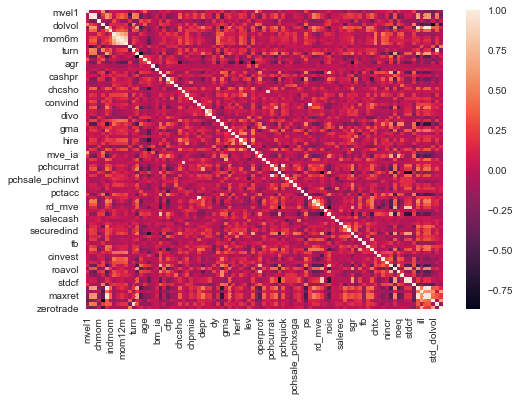

In [82]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()         
sns.heatmap(X.corr(),annot=False, ax=ax)

##### We train our model:

In [37]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate,cross_val_score
from yellowbrick.regressor import ManualAlphaSelection


alphas=np.linspace(0.1,2,20)

sr_rmse_ridge=[]
sr_mae_ridg=[]
visualizer_NRMSE_Ridge = ManualAlphaSelection(Ridge(normalize = True),alphas=alphas,cv=cv,scoring="neg_root_mean_squared_error")
visualizer_NMAE_Ridge = ManualAlphaSelection(Ridge(normalize = True),alphas=alphas,cv=cv,scoring="neg_median_absolute_error")

for i in range(len(alphas)):
    model=Ridge(alpha=alphas[i],normalize = True)
    test_score_NRMSE = cross_validate(model, Xtrain, Ytrain,scoring="neg_root_mean_squared_error",cv=cv)
    test_score_NMAE = cross_validate(model, Xtrain, Ytrain,scoring="neg_median_absolute_error",cv=cv)
    #print(scores)
    sr_rmse_ridge.append(test_score_NRMSE['test_score'].mean()) 
    sr_mae_ridg.append(test_score_NMAE['test_score'].mean()) 


##### We plot the to error arrays in the same graph:

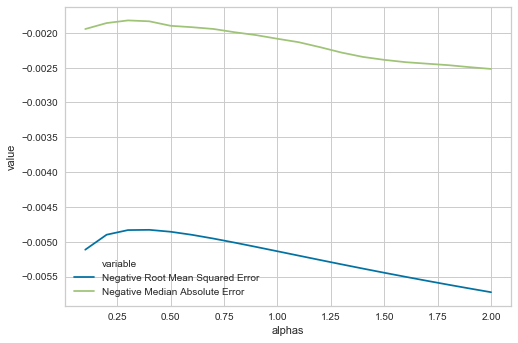

In [38]:
data1=pd.DataFrame({'Negative Root Mean Squared Error':sr_rmse_ridge,'alphas':alphas})
data2=pd.DataFrame({'Negative Median Absolute Error':sr_mae_ridg,'alphas':alphas})
data=pd.merge(data1, data2,on=['alphas'])
sns.lineplot(x='alphas', y='value', hue='variable',data=pd.melt(data, ['alphas']))

##### For a more dettailed analysis of the errors we plot both the negative root mean squared error and the negative median absolute error in different graphs:

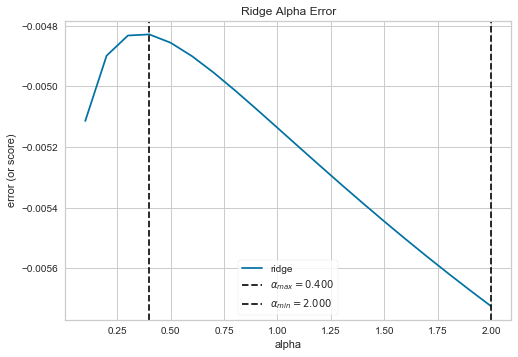

In [39]:
visualizer_NRMSE_Ridge.fit(Xtrain, Ytrain)
visualizer_NRMSE_Ridge.show()

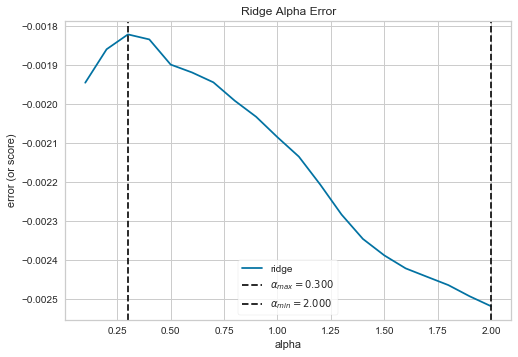

In [40]:
visualizer_NMAE_Ridge.fit(Xtrain, Ytrain)
visualizer_NMAE_Ridge.show()

**d)**
Discuss how the two series differ and why you think that is the case. If they do not differ, discuss why your results are insensitive to different scoring methods. Decide for one of the two scoring methods, which you will use for the remainder of Part I.

##### The regularization is designed to reduce the complexity of the model, therefore the higher the value of the penalty parameter, the lower the complexity of the model. The ultimate goal is to find the right balance by decreasing the overfitting and therefore the variance as much as possible, but at the same time without inducing a pronounced increase in bias that is a situation of underfitting. If the alpha value is too high, the model is so simple that it fails to grasp the relationship between the variables in the training set and there is an increase in bias. On the contrary, a too low value of the penalty parameter does not simplify the model which is much more performing on the training set than on the test set: in this case we are in an overfitting situation and the variance is high. It is therefore important to choose an optimal alpha such that the error is minimized in both directions. In this case this behavior is clearly illustrated in the graph above since the negative mean square error has a minimum absolute value for a certain value of aplha, after which it starts increasing due to the increasing bias. The same behavior is found for the negative median absolute error.

## <center> Question  3 <center>

**a)** 
Produce a similar graph as you did in the previous question using a `Lasso` model with the **one** scoring method you chose. You may have to adjust the 20 alphas before you calculate `sr_rmse_lasso` **or** `sr_mae_lasso`. 

##### For Lasso we choose alphas in the range of 10^-5 and 10^-4:

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate,cross_val_score

norm=True

alphas=np.linspace(00.000005,0.00007,20) #used 200 to catch the right value of alpha

cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=10)
sr_rmse_lasso=[]
sr_mae_lasso=[]
visualizer_NRMSE_Lasso = ManualAlphaSelection(Lasso(max_iter=5000,normalize=norm),alphas=alphas,cv=cv,scoring="neg_root_mean_squared_error")
visualizer_NMAE_Lasso = ManualAlphaSelection(Lasso(max_iter=5000,normalize=norm),alphas=alphas,cv=cv,scoring="neg_median_absolute_error")

for i in range(len(alphas)):
    model=Lasso(alpha=alphas[i],max_iter=5000,normalize=norm)
    test_score_NRMSE = cross_validate(model, Xtrain, Ytrain,scoring="neg_root_mean_squared_error",cv=cv)
    test_score_NMAE = cross_validate(model, Xtrain, Ytrain,scoring="neg_median_absolute_error",cv=cv)
    #print(scores)
    sr_rmse_lasso.append(test_score_NRMSE['test_score'].mean()) 
    sr_mae_lasso.append(test_score_NMAE['test_score'].mean()) 



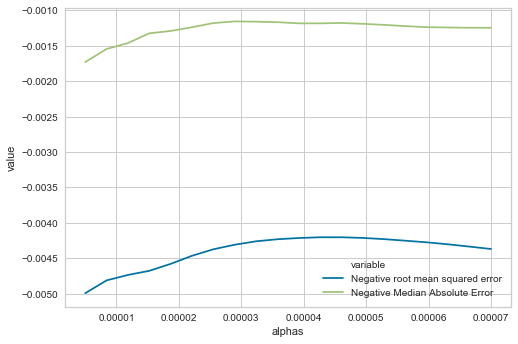

In [42]:
data1=pd.DataFrame({'Negative root mean squared error':sr_rmse_lasso,'alphas':alphas})
data2=pd.DataFrame({'Negative Median Absolute Error':sr_mae_lasso,'alphas':alphas})
data=pd.merge(data1, data2,on=['alphas'])
sns.lineplot(x='alphas', y='value', hue='variable',data=pd.melt(data, ['alphas']))

##### For a more dettailed analysis of the errors we plot both the negative root mean squared error and the negative median absolute error in different graphs:

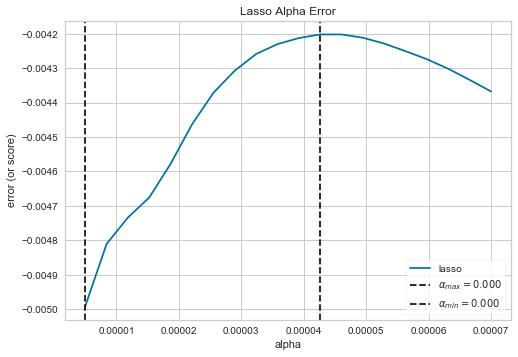

In [43]:
visualizer_NRMSE_Lasso.fit(Xtrain, Ytrain)
visualizer_NRMSE_Lasso.show()

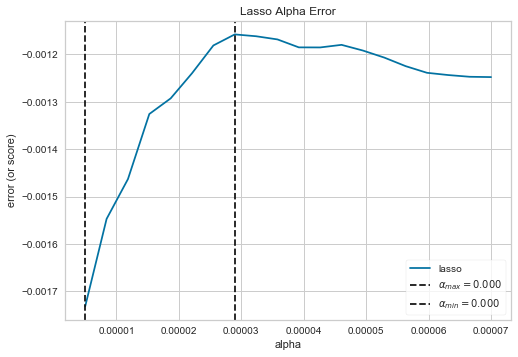

In [44]:
visualizer_NMAE_Lasso.fit(Xtrain, Ytrain)
visualizer_NMAE_Lasso.show()

**b)**
What is the optimal `alpha` parameter? Which features are most predictive if you use this `alpha`? Use a [bar plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) or [horizontal bar plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) to show the non-zero coefficients.

##### As we can see from the two previous figures, the optimal alpha value for the root mean squared error is around 4.2*10^-5. We then proceed to display the most predictive features for this value. To do this, let's start by considering the effect of the penalty parameter in the lasso regression: as the penalty parameter increases, the coefficients that multiply the different features of the training set are set to zero, up to the extreme condition where each coefficient is zero and the regression produces a straight line with zero angular coefficient, ie parallel to the x axis. Known this fact to have the most important features at the optimal alpha we just consider those features that are multiplied by non-zero coefficients:

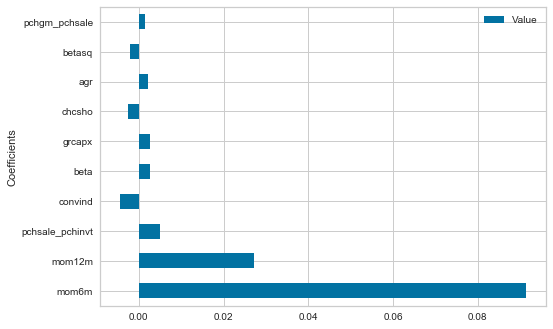

In [45]:
model=Lasso(alpha=0.000043)
model.fit(Xtrain,Ytrain)
coefficients=model.coef_
d=pd.DataFrame.from_dict({'Coefficients':X.columns[coefficients!=0],'Value':coefficients[coefficients!=0]})


d=d.loc[d['Value'].abs().sort_values(ascending=False).index].head(10)

d.plot(kind='barh',x='Coefficients')

**c)**
Are these selected variables sensible? Briefly discuss your findings using **1 or 2 features** an investor might find interesting. It is not expected of you to discuss **all** selected features. Recall that you can find more information on the features in the paper Green, Hand, Zhang (2017) in the literature folder.

##### To be done....

## <center> Question  4 <center>

**a)**
Use these 24 values for `l1_ratio` for this question. 
```python 
l1_ratios = np.linspace(0,1,25)[1:].round(3)
```
Use the same cross validation approach as for Ridge and Lasso. But instead of only calculating the average test scores for 20 `alpha` values, you also have to do this for the 24 `l1_ratio` values. At the end you will a DataFrame with 20 rows and 24 columns. The values of this DataFrame are the average test scores. 

To visualize your results, import the function `elasticnet_heatmap` from `lib.plots`. To see how to use it, follow the example below or type in `help(elasticnet_heatmap)`. If you have difficulties with the function, you can also choose another way to visualize your results.

```python
# make sure that the folder lib is in the same folder as this notebook!
from lib.plots import elasticnet_heatmap

# generate some random data
df_example = pd.DataFrame(
    np.random.randn(20,24)**2,
)

# plot the heatmap
elasticnet_heatmap(df_example)
```

In [71]:
l1_ratios = np.linspace(0.,1,25)[1:].round(3)# L1 ratios
l1_ratios

array([0.042, 0.083, 0.125, 0.167, 0.208, 0.25 , 0.292, 0.333, 0.375,
       0.417, 0.458, 0.5  , 0.542, 0.583, 0.625, 0.667, 0.708, 0.75 ,
       0.792, 0.833, 0.875, 0.917, 0.958, 1.   ])

In [72]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate,cross_val_score
from data_files.lib.plots import elasticnet_heatmap


alphas=np.linspace(0.1,10,20)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=10)

def ElasticNet_scores_matrix(Xtrain):
    sr_rmse_ElasticNet=[]
    sr_mae_ElasticNet=[]
    score_matrix=[]
    for i in range(len(l1_ratios)):
        for j in range(len(alphas)):
            model=ElasticNet(alpha=alphas[j],l1_ratio=l1_ratios[i],normalize=False)
            test_score_NRMSE = cross_validate(model, Xtrain, Ytrain,scoring="neg_root_mean_squared_error",cv=cv)
            test_score_NMAE = cross_validate(model, Xtrain, Ytrain,scoring="neg_median_absolute_error",cv=cv)
            #print(scores)
            sr_rmse_ElasticNet.append(test_score_NRMSE['test_score'].mean()) 
            sr_mae_ElasticNet.append(test_score_NMAE['test_score'].mean())
        score_matrix.append(sr_rmse_ElasticNet)
        sr_rmse_ElasticNet=[]
        sr_mae_ElasticNet=[]
    df_scores= pd.DataFrame(score_matrix)
    # plot the heatmap
    #print(df_scores)
    #return df_scores
    elasticnet_heatmap(df_scores)
    


In [73]:
Xtrain

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,38.9449,41.0516,21.7979,25.3755,14.7989,27.7508,18.3380,6.7396,8.0276,14.0444,24.6065,10.0230,1.8461,-0.8169,-0.0528,26.2219,-0.0963,-1.3348,2.5794,-5.3577,0.5432,-5.3201,-9.9397,-10.1914,-8.2629
1,-13.3767,-19.9020,-8.5836,-6.4376,-3.0211,-13.2610,-5.1470,-1.8837,-0.3158,-1.3103,-14.9907,4.1432,10.5200,6.8550,11.8577,-3.2800,13.4028,14.0104,10.2395,13.1038,9.2491,11.4767,9.6591,16.0942,15.6473
2,-23.5996,-17.7223,-9.6472,-11.3434,-9.7570,-11.9278,-9.1147,-4.2390,-2.7454,-2.6646,-9.8816,0.3620,-2.9187,3.8888,0.1531,-7.4438,-2.3261,3.6734,-0.0932,2.0394,-4.5141,-3.3649,3.2562,2.7037,6.6697
3,-13.9811,-9.6800,-4.7340,-8.0313,-6.7194,-10.0466,-5.1284,-5.9470,-7.4872,-0.8292,-4.9322,-3.5574,-1.0858,-0.0038,1.7141,-7.7604,1.2174,-1.8499,0.0572,0.1358,-3.7464,0.1801,4.3505,0.4599,-4.7119
4,29.9385,27.0061,17.2427,18.2951,10.6832,14.0773,11.0282,3.9755,4.9005,9.3486,15.3067,1.5408,0.3881,-0.9614,2.4241,10.9620,2.8020,-3.4015,-3.2936,-4.4180,5.8784,-4.2523,-7.5043,-8.5470,-7.7357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,11.1303,3.1776,4.1753,2.7412,1.7224,5.3763,2.0043,1.1481,-0.5267,2.2388,-0.2411,0.0126,0.5971,1.1675,1.6620,-0.0835,-0.2848,0.6807,0.2501,-0.1574,0.4812,0.1776,1.2128,-2.4157,0.7069
200,-10.4848,-9.2668,-6.6519,-3.2456,-3.3499,-9.8725,-7.2537,-5.5475,-2.4570,-4.9942,-5.1536,-4.8789,-2.6308,-2.8409,-4.1182,-3.3660,-1.8128,-1.0250,-1.9153,-0.4185,-2.4102,-2.0011,-1.3714,0.1245,1.7272
201,7.6665,9.4127,13.2344,13.4903,13.2111,9.6553,10.5150,12.5437,16.4938,13.6913,5.7130,8.2472,10.3244,13.4367,17.3923,3.8411,6.6545,7.0982,8.3613,15.5378,0.8651,3.8500,4.5847,7.4547,13.6418
202,1.5686,3.5102,2.4213,8.0214,4.6752,-2.8152,1.3473,2.5437,4.9870,3.5690,0.5261,1.7633,2.2322,2.4578,1.2315,-0.3507,0.3895,1.1601,1.3041,1.9709,1.3297,1.3539,1.5774,5.1137,3.3498


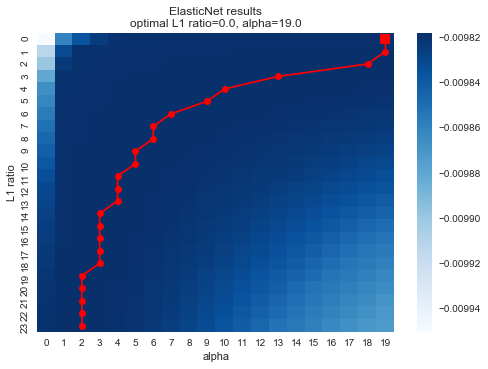

In [48]:
ElasticNet_scores_matrix(Xtrain)

**b)**
Until now, you fit a model of the type 
$$
r_i = X_i \beta + e_i
$$
with a Lasso, Ridge or ElasticNet penalty. Now, replace $X_i$ with all principal components. Using this procedure, you should have as many components $PC(X)_i$ as you have features $X_i$. 

Now, fit an ElasticNet by replacing the original features with the new principal components, that is
$$
r_i = PC(X)_i \gamma + e_i
$$

Plot the results in the same way as before using a heatmap.


In [49]:
from sklearn.decomposition import PCA

pca = PCA()
X_PCA=pca.fit_transform(Xtrain)


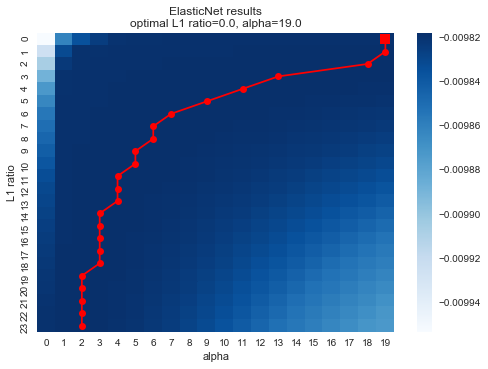

In [50]:
ElasticNet_scores_matrix(X_PCA)

**c)** 
Discuss the two heatmaps from a) and b). Do they differ? How and why do or don't they differ? 

##### As we can see the from the 2 graphs leads to same result as we have simply projected the train dataset along its principal components, which is equivalent to applying the rotation matrix of the principal components to features matrix. We can see how in both cases the best results in terms of RMSE are obtained for decreasing values of alpha for increasing values of l1_ratio

## <center> Question  5 <center>

We now switch to an entirely different perspective. Before we tried to understand how firm characteristics explain the cross-sectional variation of returns. Now we try to forecast the returns of an equally-weighted stock index $I_t$ one period ahead. This stock index is the simple average of the returns you have selected before. 

$$
I_t = \frac{1}{N} \sum_i r_{it}
$$

To forecast $I_t$ we use the [25 Fama-French double-sorted portfolios](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports.html). The underlying model is
$$
I_t = F_{t-1}\lambda + u_t
$$

where $F_t$ is are the values of the 25 Fama-French portfolios at time $t$. The vector $\lambda$ has 25 coefficients. 

**a)**
In order to forecast, you could simply estimate the model above using OLS. Why is that not a good idea if the ultimate goal is forecasting? Why is it better to use Ridge, Lasso or an ElasticNet?

#####  It is not the best idea to use the OLS, if the final goal is the forecast since this value being the result of stochastic events is not necessarily such as to exactly reflect the previous values. We want a more elastic and generalized model so that it is more widely applicable so surely reducing the complexity through L1 / L2 penality seems the best choice.

**b)** 
Compute the stock index $I_t$ and call it `sr_index`. Load the following predictors 
* `25_Portfolios_5x5.csv`
* `10_Industry_Portfolios.csv`
* `F-F_Momentum_Factor.csv`
* `F-F_Research_Data_5_Factors_2x3.csv`

and store the contents in a dataframe `df_predictors`. These are end-of-month values and have to be lagged by one month.


##### We define our $I_t$ as:

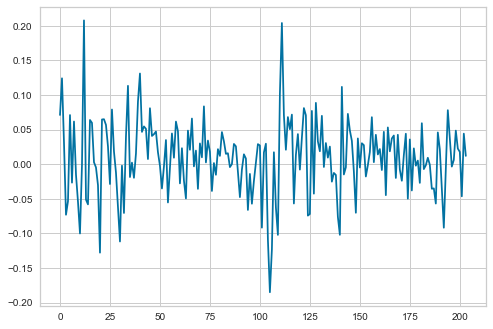

In [51]:
I_t=df.groupby(['Year','Month'],as_index=False).mean()[['ind','RET']]
#I_t=df_returns_final.groupby(['Year','Month'],as_index=False).mean()[['Year','Month','RET']]
sns.lineplot(data=I_t['RET'])

##### We load the predictors:

In [52]:
P_1=pd.read_csv('C:/Users/sunny/Desktop/fiveer/data_files/data/25_Portfolios_5x5.csv')
P_2=pd.read_csv('C:/Users/sunny/Desktop/fiveer/data_files/data/10_Industry_Portfolios.csv')
P_3=pd.read_csv('C:/Users/sunny/Desktop/fiveer/data_files/data/F-F_Momentum_Factor.csv')
P_4=pd.read_csv('C:/Users/sunny/Desktop/fiveer/data_files/data/F-F_Research_Data_5_Factors_2x3.csv')


###### We separate the date in 2 different columns Year and Month

In [53]:
def create_month_year(df):
    df['Year']=(df['Unnamed: 0']/100).astype(int)
    df['Month']=(((df['Unnamed: 0']/100)-(df['Unnamed: 0']/100).astype(int))*100).astype(int)
    
P_l=[P_1,P_2,P_3,P_4]
for i in P_l:
    create_month_year(i)

P_1.head(2)

,Unnamed: 0,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Year,Month
0,192607,3.7782,-0.4119,-1.9434,0.3530,2.0534,2.1904,2.4192,0.4926,-1.5770,-0.3344,1.9116,2.4336,0.0053,3.4572,-1.2629,1.5893,1.5278,1.1869,0.2727,2.4678,3.4539,6.0902,2.0266,3.1111,0.5623,1926,6
1,192608,-2.2074,-8.7275,2.4404,0.6086,8.3968,2.1709,-1.1849,4.0084,0.4643,6.1675,-0.9390,2.3886,1.9681,4.4450,8.1169,1.3336,3.8730,2.0059,2.1706,5.3422,1.0124,4.1903,2.0131,5.4849,7.7576,1926,7


In [54]:
df_12=pd.merge(P_1, P_2, how='inner', on=['Year', 'Month'])
df_34=pd.merge(P_3, P_4, how='inner', on=['Year', 'Month'])
df_predictors=pd.merge(df_12, df_34, how='inner', on=['Year', 'Month'])
#df_predictors[df_predictors['Month']==0]['Year']-=1

df_predictors.loc[df_predictors['Month']==0,'Year']=df_predictors[df_predictors['Month']==0]['Year']-1
df_predictors.loc[df_predictors['Month']==0,'Month']=12


In [55]:
df_predictors=df_predictors.drop(['Unnamed: 0_x_x','Unnamed: 0_x_x','Unnamed: 0_x_y','Unnamed: 0_y_y','Unnamed: 0_y_x'],axis=1)
#df_predictors


**c)**
Produce two ElasticNet heatmaps for this forecasting problem. One with $F_{t-1}$ and one with $PC(F_{t-1})$, where the latter denotes the principal components of `df_predictors`. As before, do not restrict the number of components. Do you keep the same cross validator as before?


In [56]:
#P_1['Month'].value_counts()

In [57]:
I_t=df_returns_final.groupby(['Year','Month'],as_index=False).mean()[['Year','Month','RET']]

P_1.loc[P_1['Month']==0,'Year']=P_1[P_1['Month']==0]['Year']-1
P_1.loc[P_1['Month']==0,'Month']=12
if 'Unnamed: 0' in P_1.columns.tolist():
    P_1=P_1.drop(['Unnamed: 0'],axis=1)
P_1
F=pd.merge(I_t, P_1, how='inner', on=['Year', 'Month'])

In [58]:
F=F.drop(['Year','Month'],axis=1)
F

,RET,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,0.032368,38.9449,41.0516,21.7979,25.3755,14.7989,27.7508,18.3380,6.7396,8.0276,14.0444,24.6065,10.0230,1.8461,-0.8169,-0.0528,26.2219,-0.0963,-1.3348,2.5794,-5.3577,0.5432,-5.3201,-9.9397,-10.1914,-8.2629
1,0.079459,-13.3767,-19.9020,-8.5836,-6.4376,-3.0211,-13.2610,-5.1470,-1.8837,-0.3158,-1.3103,-14.9907,4.1432,10.5200,6.8550,11.8577,-3.2800,13.4028,14.0104,10.2395,13.1038,9.2491,11.4767,9.6591,16.0942,15.6473
2,0.048735,-23.5996,-17.7223,-9.6472,-11.3434,-9.7570,-11.9278,-9.1147,-4.2390,-2.7454,-2.6646,-9.8816,0.3620,-2.9187,3.8888,0.1531,-7.4438,-2.3261,3.6734,-0.0932,2.0394,-4.5141,-3.3649,3.2562,2.7037,6.6697
3,-0.032664,-13.9811,-9.6800,-4.7340,-8.0313,-6.7194,-10.0466,-5.1284,-5.9470,-7.4872,-0.8292,-4.9322,-3.5574,-1.0858,-0.0038,1.7141,-7.7604,1.2174,-1.8499,0.0572,0.1358,-3.7464,0.1801,4.3505,0.4599,-4.7119
4,-0.035558,29.9385,27.0061,17.2427,18.2951,10.6832,14.0773,11.0282,3.9755,4.9005,9.3486,15.3067,1.5408,0.3881,-0.9614,2.4241,10.9620,2.8020,-3.4015,-3.2936,-4.4180,5.8784,-4.2523,-7.5043,-8.5470,-7.7357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.010162,11.1303,3.1776,4.1753,2.7412,1.7224,5.3763,2.0043,1.1481,-0.5267,2.2388,-0.2411,0.0126,0.5971,1.1675,1.6620,-0.0835,-0.2848,0.6807,0.2501,-0.1574,0.4812,0.1776,1.2128,-2.4157,0.7069
200,0.003659,-10.4848,-9.2668,-6.6519,-3.2456,-3.3499,-9.8725,-7.2537,-5.5475,-2.4570,-4.9942,-5.1536,-4.8789,-2.6308,-2.8409,-4.1182,-3.3660,-1.8128,-1.0250,-1.9153,-0.4185,-2.4102,-2.0011,-1.3714,0.1245,1.7272
201,-0.037187,7.6665,9.4127,13.2344,13.4903,13.2111,9.6553,10.5150,12.5437,16.4938,13.6913,5.7130,8.2472,10.3244,13.4367,17.3923,3.8411,6.6545,7.0982,8.3613,15.5378,0.8651,3.8500,4.5847,7.4547,13.6418
202,0.063226,1.5686,3.5102,2.4213,8.0214,4.6752,-2.8152,1.3473,2.5437,4.9870,3.5690,0.5261,1.7633,2.2322,2.4578,1.2315,-0.3507,0.3895,1.1601,1.3041,1.9709,1.3297,1.3539,1.5774,5.1137,3.3498


In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate,cross_val_score
from data_files.lib.plots import elasticnet_heatmap


alphas=np.linspace(0.001,0.03,20)
l1_ratios = np.linspace(0.1,1,25)[1:].round(3)# L1 ratios
cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=10)

def ElasticNet_scores_matrix(Xtrain,Ytrain):
    sr_rmse_ElasticNet=[]
    sr_mae_ElasticNet=[]
    score_matrix=[]
    for i in range(len(l1_ratios)):
        for j in range(len(alphas)):
            #print(alphas[j],l1_ratios[i])
            model=ElasticNet(alpha=alphas[j],l1_ratio=l1_ratios[i],normalize=False,max_iter=5000)
            test_score_NRMSE = cross_validate(model, Xtrain, Ytrain,scoring="neg_root_mean_squared_error",cv=cv)
            test_score_NMAE = cross_validate(model, Xtrain, Ytrain,scoring="neg_median_absolute_error",cv=cv)
            sr_rmse_ElasticNet.append(test_score_NRMSE['test_score'].mean()) 
            sr_mae_ElasticNet.append(test_score_NMAE['test_score'].mean())
        score_matrix.append(sr_rmse_ElasticNet)
        sr_rmse_ElasticNet=[]
        sr_mae_ElasticNet=[]
    df_scores= pd.DataFrame(score_matrix)
    elasticnet_heatmap(df_scores)
    return score_matrix
    

In [60]:
Xtrain=F.drop(['RET'],axis=1).values
Ytrain=F['RET']
Xtrain.shape

(204, 25)

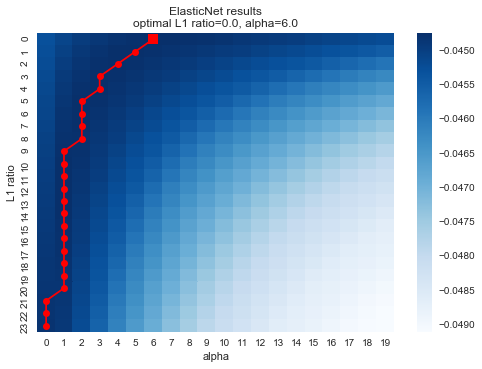

In [61]:
a=ElasticNet_scores_matrix(Xtrain,Ytrain)

In [69]:
pd.DataFrame(a).abs().min(axis=1)

0     0.044745
1     0.044747
2     0.044749
3     0.044749
4     0.044752
5     0.044755
6     0.044751
7     0.044753
8     0.044767
9     0.044771
10    0.044759
11    0.044752
12    0.044752
13    0.044754
14    0.044757
15    0.044767
16    0.044781
17    0.044792
18    0.044805
19    0.044820
20    0.044836
21    0.044827
22    0.044819
23    0.044809
dtype: float64

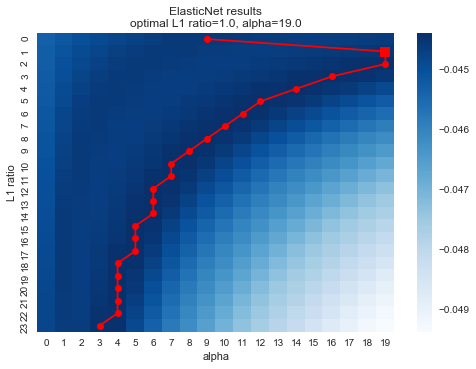

In [63]:
from sklearn.decomposition import PCA
Xtrain=F.drop(['RET'],axis=1)
Ytrain=F['RET']
pca = PCA()
X_PCA=pca.fit_transform(Xtrain)
b=ElasticNet_scores_matrix(X_PCA,Ytrain)

**d)**
Are the two heatmaps different from each other? If they do not differ, why does using PCAs not change the graph?

##### The two heatmaps represent the same trend, that is, for increasing values of the l1_ratio, the optimal value of the error occurs for decreasing values of alpha. The points where these minima are found change as a result of the application of the PCA to our dataset, however not reducing the dimension of Xtrain after using PCA would imply that the PCA scores are able to recover all the variability from the original variables in Xtrain. Now, when adding a penalization such as elastic net, we impose some additional constraints on the β coefficients associated to the variables. Since the variables in Xtrain are different from those in the PCA scores, it is expected that the same alpha and l1_ratio values for the elastic net provide different results when using Xtrain or the PCA scores. As we can expect, we find very close minimum error values regardless of using Xtrain or the full PCA scores, but those error values are found using different elastic net parameter values. 



**e)** How do the two heatmaps here differ from to the two heatmaps in Question 4? Are they comparable or entirely different? Explain your findings.

###### The heatmaps here are similar in terms of trend, in both cases we can in fact see how as the l1_ratio alpha increases, it tends to decrease compared to the heatmaps in question 4 however we see how the error is higher.

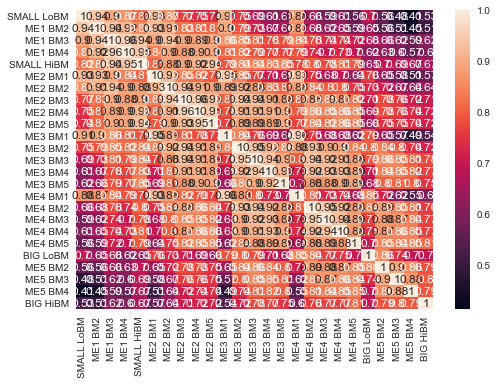

In [70]:
sns.heatmap(Xtrain.corr(),annot=True)

## Bonus

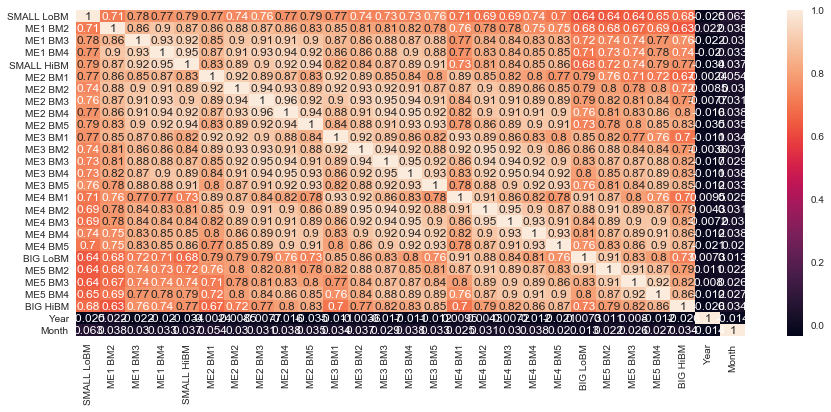

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,6))         
sns.heatmap(P_1.corr(),annot=True, ax=ax)

In [66]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.neural_network import MLPRegressor


Search_spaces_NN={
    'alpha':Real(0.1, 0.999),
    'learning_rate': ['adaptive','constant', 'invscaling'],
    'momentum':Real(0.1, 0.999),
    'beta_1':Real(0.1, 0.999),
    'beta_2':Real(0.1, 0.999),
    'nesterovs_momentum':[True,False],
    'solver':['lbfgs', 'sgd', 'adam'],
    'activation': ['tanh', 'relu'],   
}


n_itt=50
bayes_cv_tuner = BayesSearchCV(
    estimator=MLPRegressor(hidden_layer_sizes=(1000,)),
    search_spaces=Search_spaces_NN,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    n_iter=n_itt,
    verbose=0,
    refit=True,
    random_state=42
)

def status_print(optim_result):

    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)

    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{} Best Score: {}\n'.format(len(all_models),np.round(bayes_cv_tuner.best_score_, 5))) 
Bayes_ = bayes_cv_tuner.fit(Xtrain, Ytrain,callback=status_print)

Model #1 Best Score: -0.07132

Model #2 Best Score: -0.0465

Model #3 Best Score: -0.0465

Model #4 Best Score: -0.0465

Model #5 Best Score: -0.0465

Model #6 Best Score: -0.04481

Model #7 Best Score: -0.04481

Model #8 Best Score: -0.04481

Model #9 Best Score: -0.04481

Model #10 Best Score: -0.04481

Model #11 Best Score: -0.04453

Model #12 Best Score: -0.04453

Model #13 Best Score: -0.04453

Model #14 Best Score: -0.04453

Model #15 Best Score: -0.04453

Model #16 Best Score: -0.04453

Model #17 Best Score: -0.04453

Model #18 Best Score: -0.04453

Model #19 Best Score: -0.04453

Model #20 Best Score: -0.04453

Model #21 Best Score: -0.04453

Model #22 Best Score: -0.04453

Model #23 Best Score: -0.04453

Model #24 Best Score: -0.04453

Model #25 Best Score: -0.04453

Model #26 Best Score: -0.04453

Model #27 Best Score: -0.04453

Model #28 Best Score: -0.04453

Model #29 Best Score: -0.04453

Model #30 Best Score: -0.04453

Model #31 Best Score: -0.04453

Model #32 Best Score:

c:\users\sunny\pycharmprojects\pr\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [149]:
Bayes_.best_estimator_

MLPRegressor(activation='tanh', alpha=0.8502846956159426, beta_1=0.1,
             hidden_layer_sizes=(1000,), learning_rate='invscaling',
             momentum=0.999, solver='lbfgs')

## Question 6

##### This is a big issue in machine learning as it represents the main limitation in building a model that perfectly fits the reality of the problem studied. The bias can be seen as the error associated with the training, while the variance the error associated with the validation: if we decrease the bias the model will perform very well on the training data (lower training error) but little on a validation data (higher validation error) and we increase the variance, vice versa if we decrease the variance we increase the bias. Usually the model is trained so that the validation error is as small as possible and in part one we have applied the penalties L1 and L2 for in order to obtain the right compromise.

## Question 7

##### Studies found that culture and beliefs influence how individuals make economic decision as well as investment decisions (Hong et al., 2004; Huang, 2008; Chui et al., 2010; Beugelsdijk and Frijns, 2010; Guiso et al. 2006 and 2008). In the past, the relationship between gender and risk taking behavior has been studied quite frequently. One particular aspect that has received a lot of attention in recent years is the significance of difference in risk taking behavior by gender as a determinant of household investments (Campbell, 2006). It also indicates that there is a positive relationship between women age and risk aversion. Women hold less risky investment as their age increase than men.Graham, Stendardi, Myers and Graham (2002) found that women are more comprehensive in information processing than men and tend to give more weight to negative information therefore leading them to be more risk averse than men. Individual risk taking behavior is also influenced by regret (Inman and Zeelenberg, 2002; Zeelenberg et al., 1996; Zeelenberg and Beattie, 1997; Zeelenberg, 1999). For example, people tend to avoid regret of making a bad investment or shame of reporting a loss in the future by avoiding risk now which lead to being risk averse investor.  However, researchers document that investors follow the crowd to avoid the feeling of regret where there is a possibility that their decisions prove to be wrong. Personal trust plays such an important role in financial market even though this concept does not fit in to the current financial theory.  In addition, Guiso et al. (2008) argues that one‟s trust highly depends on his ethnic origin and religious background indicating the relationship between religion background, ethnic origin and risk taking behavior. 
from https://www.researchgate.net/publication/235725922_Gender_Ethnicity_and_Religion_and_Investment_Decisions_Malaysian_Evidence

## Question 8

##### External validity is the extent to which the casual relationship observed and proved within a particular study can be inferred to exist in a larger sample, population, or under different circumstances. The external validity in this sense is linked to the validity of the model on new data, that is, that on which it has never been trained. Let's cosider for a moment that the use of cross validation is due to try to simulate a possible real scenario: training the model on n-1 fold, it is tested on the n-th fold to have an estimate of the generalization capacity of the model itself. However, this poses limitations as the cross-validation error does not have a negligible variance, especially if the size of the dataset is small. The lesson to take away is that the cross validation despite giving us information about the model does not accurately represent the real performances of the model, these can only be measured fairly on a test dataset. The more the training dataset is small, the more the cross validation is less reliable, the more the dataset is large the more the cross-validation is reliable without ever being 100% except in some specific cases where the statistical distribuition of the trainig dataset mirrors perfectly the statistical distribuition of the test dataset. For example, suppose we have a classification problem: we perform hyperparameters tuning on our dataset and we calculate an accuracy value through cross validation around 95%. Now we test our model on additional data collected, and we get an accuracy of around 70%. The problem is now observable from two perspectives: the first is that the training dataset on which we trained the model is not representative of the entire population of data, so we have to re-chose our data in a better way. The second is that the additional data is not representative of the entire population, so we have to re-chose the test dataset. If the additional data perfectly match the statistical characteristics of the training dataset, we would have an accuracy of 95% exactly the same we get trough cross-validation on our training dataset.